In [1]:
import pandas as pd
import seaborn as sns
import datetime
import ladybug

%matplotlib inline

# Weather Data Analysis

As we are not using grasshopper/Rhino to display data it seemed a good idea to use some well established python tools to run our data analysis. In this case famous pandas/seaborn duo seems like a good starting point. Pandas will be useful for quick and efficient data manipulation (as epws are really slightly borked looking csvs) and seaborn will be great for one line data viz.

In [7]:
# EPW parsing functionality
# Read past this if you don't care for code.

def get_datetime(row):
    return datetime.datetime(year=2017, month=row['Month'], day=row['Day'], hour=row['Hour']-1)

def get_doy(row):
    monthDays = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    return sum(monthDays[:row['Month']]) + row['Day']

def inplace_change(filename, old_string, new_string):
    # Safely read the input filename using 'with'
    with open(filename) as f:
        s = f.read()
        if old_string not in s:
#             print '"{old_string}" not found in {filename}.'.format(**locals())
            return

    # Safely write the changed content, if found in the file
    with open(filename, 'w') as f:
#         print 'Changing "{old_string}" to "{new_string}" in {filename}'.format(**locals())
        s = s.replace(old_string, new_string)
        f.write(s)
        
def epw_to_df(epw_path, skiprows=8):
    inplace_change(epw_path, '\n\n', '\n')
    
    df = pd.read_csv(epw_path, skiprows=skiprows, header=None)
    df = df.reset_index()

    # df = df.iloc[:, :37]
    epw_columns = ['Index',
                   'Year',
                    'Month',
                    'Day',
                    'Hour',
                    'Minute',
                    'Remove',
                    'Dry_Bulb_Temperature',
                    'Dew_Point_Temperature',
                    'Relative_Humidity',
                    'Atmospheric_Station_Pressure',
                    'Extraterrestrial_Horizontal_Radiation',
                    'Extraterrestrial_Direct_Normal_Radiation',
                    'Horizontal_Infrared_Radiation_Intensity',
                    'Global_Horizontal_Radiation',
                    'Direct_Normal_Radiation',
                    'Diffuse_Horizontal_Radiation',
                    'Global_Horizontal_Illuminance',
                    'Direct_Normal_Illuminance',
                    'Diffuse_Horizontal_Illuminance',
                    'Zenith_Luminance',
                    'Wind_Direction',
                    'Wind_Speed',
                    'Total_Sky_Cover',
                    'Opaque_Sky_Cover',
                    'Visibility',
                    'Ceiling_Height',
                    'Present_Weather_Observation',
                    'Present_Weather_Codes',
                    'Precipitable_Water',
                    'Aerosol_Optical_Depth',
                    'Snow_Depth',
                    'Days_Since_Last_Snowfall',
                    'Albedo',
                    'Liquid_Precipitation_Depth',
                    'Liquid_Precipitation_Quantity']

    df.columns = epw_columns
    df['datetime'] = df.apply(lambda row: get_datetime(row), axis=1)
    df['doy'] = df.apply(lambda row: get_doy(row), axis=1)

    return df


In [43]:
epw_path = 'data/ESP_MALAGA-AP_084820_IW2.epw'

df = epw_to_df(epw_path)

df.head()

,Index,Year,Month,Day,Hour,Minute,Remove,Dry_Bulb_Temperature,Dew_Point_Temperature,Relative_Humidity,...,Present_Weather_Codes,Precipitable_Water,Aerosol_Optical_Depth,Snow_Depth,Days_Since_Last_Snowfall,Albedo,Liquid_Precipitation_Depth,Liquid_Precipitation_Quantity,datetime,doy
0,0,2001,1,1,1,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9?9?9?9*_*9*9*9...,11.6,10.7,94,...,999999999,200,0.0,0,88,999.0,0.0,1.0,2017-01-01 00:00:00,1
1,1,2001,1,1,2,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9?9?9?9*_*9*9*9...,8.9,7.4,90,...,999999999,160,0.0,0,88,999.0,0.0,1.0,2017-01-01 01:00:00,1
2,2,2001,1,1,3,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9?9?9?9*_*9*9*9...,7.0,6.0,93,...,999999999,139,0.0,0,88,999.0,0.0,1.0,2017-01-01 02:00:00,1
3,3,2001,1,1,4,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9?9?9?9*_*9*9*9...,9.8,8.6,92,...,999999999,170,0.0,0,88,999.0,0.0,1.0,2017-01-01 03:00:00,1
4,4,2001,1,1,5,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9?9?9?9*_*9*9*9...,7.0,6.0,93,...,999999999,139,0.0,0,88,999.0,0.0,1.0,2017-01-01 04:00:00,1


In [23]:
import datetime

def get_datetime(row):
    return datetime.datetime(year=2017, month=row['Month'], day=row['Day'], hour=row['Hour']-1)

def get_doy(row):
    monthDays = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    return sum(monthDays[:row['Month']]) + row['Day']

df['datetime'] = df.apply(lambda row: get_datetime(row), axis=1)
df['doy'] = df.apply(lambda row: get_doy(row), axis=1)

df.head()

,Index,Year,Month,Day,Hour,Minute,Remove,Dry_Bulb_Temperature,Dew_Point_Temperature,Relative_Humidity,...,Present_Weather_Codes,Precipitable_Water,Aerosol_Optical_Depth,Snow_Depth,Days_Since_Last_Snowfall,Albedo,Liquid_Precipitation_Depth,Liquid_Precipitation_Quantity,datetime,doy
0,0,2001,1,1,1,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9?9?9?9*_*9*9*9...,11.6,10.7,94,...,999999999,200,0.0,0,88,999.0,0.0,1.0,2017-01-01 00:00:00,1
1,1,2001,1,1,2,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9?9?9?9*_*9*9*9...,8.9,7.4,90,...,999999999,160,0.0,0,88,999.0,0.0,1.0,2017-01-01 01:00:00,1
2,2,2001,1,1,3,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9?9?9?9*_*9*9*9...,7.0,6.0,93,...,999999999,139,0.0,0,88,999.0,0.0,1.0,2017-01-01 02:00:00,1
3,3,2001,1,1,4,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9?9?9?9*_*9*9*9...,9.8,8.6,92,...,999999999,170,0.0,0,88,999.0,0.0,1.0,2017-01-01 03:00:00,1
4,4,2001,1,1,5,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9?9?9?9*_*9*9*9...,7.0,6.0,93,...,999999999,139,0.0,0,88,999.0,0.0,1.0,2017-01-01 04:00:00,1


In [24]:
def heatmap_matrix(value):
    hm = df.pivot(index='Hour', columns='doy')[value]
    hm = hm.reindex(index=hm.index[::-1])
    return hm

cmap = sns.color_palette("hls", 8)

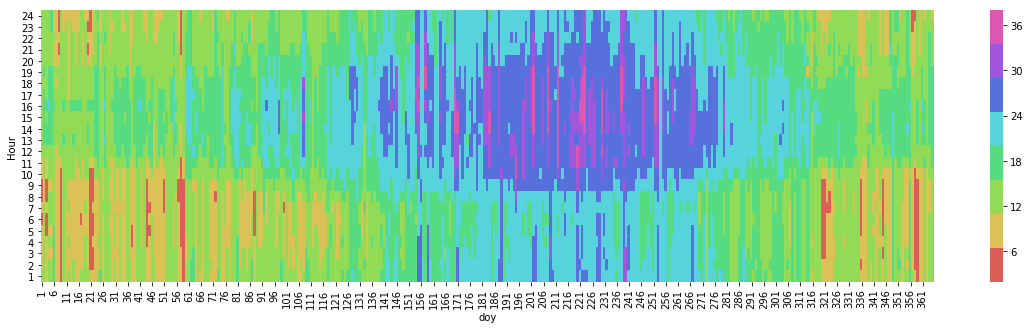

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,5))

ax = sns.heatmap(heatmap_matrix('Dry_Bulb_Temperature'), cmap=cmap)

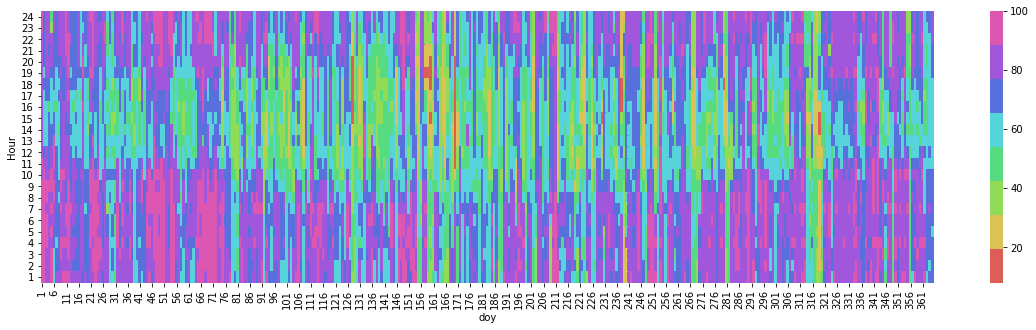

In [26]:
plt.figure(figsize = (20,5))

ax = sns.heatmap(heatmap_matrix('Relative_Humidity'), cmap= cmap)

In [165]:
epw_path = 'data/ESP_MALAGA-AP_084820_IW2.epw'
new_epw_path = 'data/baseline.epw'

# epw_path = 'urban_heat_island/ESP_MALAGA-AP_084820_IW2.epw'
# new_epw_path = 'urban_heat_island/ESP_MALAGA-AP_084820_IW2_URBAN.epw'

df_new = epw_to_df(new_epw_path)
df_original = epw_to_df(epw_path)

Text(0.5,1,'Wind Speed difference from UHI')

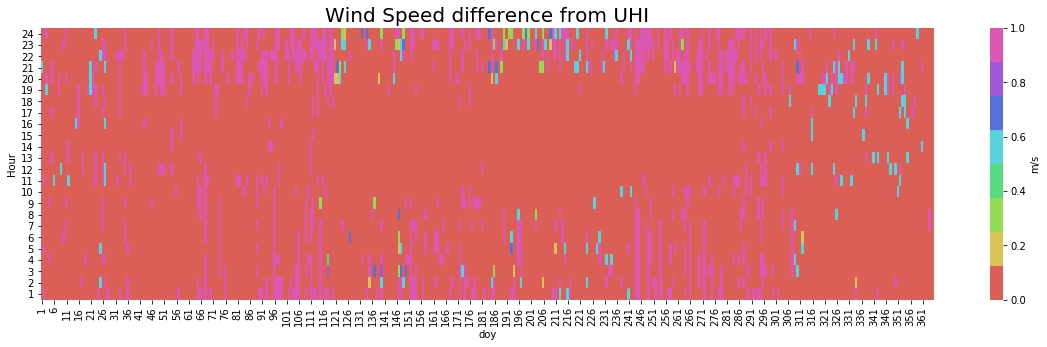

In [167]:
# value = 'Dry_Bulb_Temperature'
# value = 'Dew_Point_Temperature'
# value = 'Relative_Humidity'
value = 'Wind_Speed'
# value = 'Dew_Point_Temperature'

diff = df_new
dump = df_new

diff[value] = dump[value] - df_original[value]

diff = diff.pivot(index='Hour', columns='doy')[value]
diff = diff.reindex(index=diff.index[::-1])

plt.figure(figsize = (20,5))


ax = sns.heatmap(diff, cmap= cmap, cbar_kws={'label': 'm/s'})

ax.set_title('{} difference from UHI'.format(' '.join(value.split('_'))), fontsize=20)

## 2. Parametric Simulation Post Processing

Now that we have looked at how the baseline neighborhood design impacts the local climate it's time to analyse the results from the parametric study. In order to do this we will have to:
1. Read all the epws saved in the data folder and merge them into one big dataframe inspirationally called `df` (be sure to keep the design parameter values in each row)
2. Remove the impact of seasonality on the dataset by focusing on one month of averaged data
3. Run a quick correlation and make a fancy heat map

### 1. Read all the things

The step below reads and merges all the simulated EPWs.

In [152]:
import os
import re

folder = os.path.join(os.getcwd(), 'data')

df_list = []

regex = r"([a-z]+_[a-z]+_\d.?\d?_)"

for file_path in os.listdir(folder)[2:]:
    matches = re.finditer(regex, file_path, re.MULTILINE)
    params = []

    for matchNum, match in enumerate(matches):
        param = match.group().split('_')
        params.append((' '.join(param[:2]), param[2]))
    
    iter_df = epw_to_df(os.path.join(folder, file_path))
    
    for param in params:
        iter_df[param[0]] = param[1]
        
    df_list.append(iter_df)
    
df_total = pd.concat(df_list)

df_total.shape

(4257360, 45)

In [3]:
import pandas as pd
df_total = pd.read_csv('malaga_parametric_epw.csv')

Dump all the things to a csv so we don't have to read and merge again if we break something.

In [4]:
df_total.to_csv('malaga_parametric_epw.csv')

Clean the df for human use.

In [5]:
df = df_total[['datetime','doy','glz ratio','grass cov','pav albedo',
          'roof albedo','traffic heat','tree cov','wall albedo',
          'Dry_Bulb_Temperature',
          'Dew_Point_Temperature',
          'Relative_Humidity',
          'Wind_Speed']]

df.to_csv('malaga_clean_epws.csv')

df.head()

,datetime,doy,glz ratio,grass cov,pav albedo,roof albedo,traffic heat,tree cov,wall albedo,Dry_Bulb_Temperature,Dew_Point_Temperature,Relative_Humidity,Wind_Speed
0,2017-01-01 00:00:00,1,0.2,0.1,NaN,0.2,2,NaN,NaN,11.8,10.7,92.6,2.1
1,2017-01-01 01:00:00,1,0.2,0.1,NaN,0.2,2,NaN,NaN,11.3,7.4,76.5,2.6
2,2017-01-01 02:00:00,1,0.2,0.1,NaN,0.2,2,NaN,NaN,9.9,6.0,76.5,3.1
3,2017-01-01 03:00:00,1,0.2,0.1,NaN,0.2,2,NaN,NaN,10.1,8.6,90.2,3.6
4,2017-01-01 04:00:00,1,0.2,0.1,NaN,0.2,2,NaN,NaN,8.9,6.0,81.7,3.6


Quick example of multi-indexing.

In [10]:
df[(df['grass cov'] == 0.3)
   & (df['glz ratio'] == 0.3)
   & (df['roof albedo'] == 0.2)].head()

,datetime,doy,glz ratio,grass cov,pav albedo,roof albedo,traffic heat,tree cov,wall albedo,Dry_Bulb_Temperature,Dew_Point_Temperature,Relative_Humidity,Wind_Speed
1576800,2017-01-01 00:00:00,1,0.3,0.3,NaN,0.2,2,NaN,NaN,11.8,10.7,92.6,2.1
1576801,2017-01-01 01:00:00,1,0.3,0.3,NaN,0.2,2,NaN,NaN,11.4,7.4,76.1,2.6
1576802,2017-01-01 02:00:00,1,0.3,0.3,NaN,0.2,2,NaN,NaN,10.4,6.0,73.8,3.1
1576803,2017-01-01 03:00:00,1,0.3,0.3,NaN,0.2,2,NaN,NaN,10.1,8.6,90.3,3.6
1576804,2017-01-01 04:00:00,1,0.3,0.3,NaN,0.2,2,NaN,NaN,9.4,6.0,79.1,3.6


### 2. Remove seasonality
Arguably focusing on just one month is a really lazy way of removing seasonality. I'm sure you're a better/less time bound individual who will think of a better way to do this. In the meanwhile let's look at July in Malaga!

In [194]:
grouped = df.groupby(by=[df.datetime.dt.month,
               'glz ratio','grass cov','pav albedo',
               'roof albedo','traffic heat','tree cov','wall albedo']).mean().reset_index()

grouped[['glz ratio','grass cov','pav albedo',
         'roof albedo','traffic heat','tree cov','wall albedo']] = grouped[['glz ratio','grass cov','pav albedo',
                                                                     'roof albedo','traffic heat','tree cov','wall albedo']].apply(pd.to_numeric)

# grouped = grouped.drop('datetime', axis=1)

grouped = grouped.drop('doy', axis=1)
grouped.head()

,datetime,glz ratio,grass cov,pav albedo,roof albedo,traffic heat,tree cov,wall albedo,Dry_Bulb_Temperature,Dew_Point_Temperature,Relative_Humidity,Wind_Speed
0,1,0.2,0.0,0.1,0.2,2,0.1,0.2,12.306989,7.040457,71.174866,3.960349
1,1,0.2,0.0,0.1,0.2,4,0.1,0.2,12.309812,7.040457,71.160484,3.960349
2,1,0.2,0.0,0.2,0.2,2,0.1,0.2,12.306452,7.040457,71.179301,3.960349
3,1,0.2,0.0,0.2,0.2,4,0.1,0.2,12.308737,7.040457,71.165457,3.960349
4,1,0.2,0.1,0.1,0.2,2,0.1,0.2,12.305780,7.040457,71.184543,3.960349


### 3. Correlate all the things

All we've got left to do is run a correlation between our environmental factors and the parameters of our study and BOOM we're done.

In [200]:
corr = grouped[grouped['datetime']==8].corr()

corr = corr.drop('datetime', axis=1)
corr = corr.drop('datetime', axis=0)

corr.head()

,glz ratio,grass cov,pav albedo,roof albedo,traffic heat,tree cov,wall albedo,Dry_Bulb_Temperature,Dew_Point_Temperature,Relative_Humidity,Wind_Speed
glz ratio,1.000000e+00,0.000000e+00,-3.540989e-17,4.028859e-16,0.0,4.028859e-16,4.028859e-16,-2.594600e-02,3.777055e-16,5.380259e-02,7.554111e-17
grass cov,0.000000e+00,1.000000e+00,0.000000e+00,9.890653e-17,0.0,9.890653e-17,9.890653e-17,-9.901551e-01,1.236332e-17,9.906424e-01,-1.087972e-16
pav albedo,-3.540989e-17,0.000000e+00,1.000000e+00,2.775558e-16,0.0,2.775558e-16,2.775558e-16,2.522002e-02,2.775558e-16,-3.606164e-02,3.330669e-16
roof albedo,4.028859e-16,9.890653e-17,2.775558e-16,1.000000e+00,0.0,1.000000e+00,1.000000e+00,-1.026595e-12,1.000000e+00,7.798811e-13,1.000000e+00
traffic heat,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,1.139945e-01,0.000000e+00,-1.137581e-01,0.000000e+00


Text(0.5,1,'Correlation between simulation parameters and climatic outcomes in July')

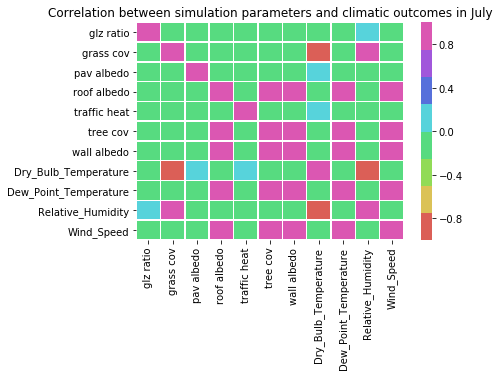

In [201]:
ax = sns.heatmap(corr, cmap= cmap, linewidths=.5)

ax.set_title('Correlation between simulation parameters and climatic outcomes in July')